In [1]:
import numpy as np
import pandas as pd
import os

In [8]:
# path = r"C:\Users\raulo\Desktop\ze_vids\tracks_and_labels\adapted"

# # Get a list of all files in the folder
# file_list = os.listdir(path)

# # Iterate over each file in the folder
# for file_name in file_list:
#     # Check if the file is a CSV file
#     if file_name.endswith('.csv'):
#         # Extract the file number from the file name
#         file_number = file_name.split("_")[0]
        
#         # Read the CSV file into a data frame
#         file_path = os.path.join(path, file_name)
#         df = pd.read_csv(file_path, sep = ";")
#         df = df.rename(columns={'Unnamed: 0': 'Frame'})

In [90]:
df = pd.read_csv(r"C:\Users\raulo\Desktop\ze_vids\combined_labels_and_tracks_imputed.csv")

In [101]:
df["Behavior"].value_counts()

Background     419849
interaction     73498
posing            949
jolts             153
TS                 16
Name: Behavior, dtype: int64

In [91]:
filtered_df = df[(df['Behavior'] == "interaction")]
filtered_df

,Behavior,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Eye_L,Client_Eye_L.1,Client_Eye_L.2,Client_Eye_R,Client_Eye_R.1,Client_Eye_R.2,...,Cleaner_Mouth.2,Cleaner_Spine1,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2
1567,interaction,1295.012,432.318,1.0,1266.162,419.243,1.0,1267.233,444.660,1.0,...,1.0,1551.792,646.536,1.000,1590.567,662.383,1.0,1605.840,703.504,1.0
1568,interaction,1295.923,432.718,1.0,1267.597,419.243,1.0,1268.798,444.660,1.0,...,1.0,1547.931,643.519,1.000,1587.519,656.757,1.0,1606.277,702.302,1.0
1569,interaction,1301.080,433.035,1.0,1270.526,419.243,1.0,1278.369,444.879,1.0,...,1.0,1543.757,635.043,1.000,1583.440,651.835,1.0,1606.277,687.858,1.0
1570,interaction,1305.797,433.455,1.0,1278.251,420.589,1.0,1280.880,444.879,1.0,...,1.0,1532.342,634.424,1.000,1579.467,643.850,1.0,1605.840,674.324,1.0
1571,interaction,1308.288,435.489,1.0,1278.804,420.998,1.0,1282.299,445.310,1.0,...,1.0,1531.761,633.604,1.000,1573.716,640.891,1.0,1605.840,670.711,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491183,interaction,491.678,754.183,1.0,461.218,742.320,1.0,462.082,764.914,1.0,...,1.0,539.767,666.236,1.000,570.995,694.362,1.0,620.103,692.081,1.0
491184,interaction,493.421,758.459,1.0,466.957,743.474,1.0,463.535,771.482,1.0,...,1.0,531.267,660.602,1.000,565.020,683.507,1.0,609.977,703.529,1.0
491185,interaction,501.507,758.483,1.0,475.468,747.522,1.0,466.792,772.151,1.0,...,1.0,523.744,649.765,1.000,555.282,677.174,1.0,596.662,703.529,1.0
491186,interaction,506.593,759.770,1.0,476.792,747.522,1.0,469.242,772.878,1.0,...,1.0,522.946,648.093,1.000,554.717,672.627,1.0,589.458,703.529,1.0


In [11]:
# Sample function to calculate distance between two points
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Sample function to check proximity
def check_proximity(row, fish1_points, fish2_points, proximity_threshold):
    for fish1_point in fish1_points:
        for fish2_point in fish2_points:
            distance = calculate_distance(row[fish1_point], row[fish1_point+".1"], row[fish2_point], row[fish2_point+'.1'])
            if distance <= proximity_threshold:
                return 'Close' , distance
    return 'Farther', distance


In [60]:
# Define your fish points and proximity threshold
cleaner_points = ['Cleaner_Mouth', 'Cleaner_Spine1']  # Adjust as needed
client_points = ['Client_Mouth', 'Client_Eye_L', 'Client_Eye_R', 
                 'Client_Spine_1', 'Client_Spine_2', 'Client_Tail']  # Adjust as needed

proximity_threshold = 200  # Adjust as needed


# Apply the check_proximity function to each row
proximity_results = filtered_df.apply(lambda row: check_proximity(row, cleaner_points, client_points, proximity_threshold), axis=1)

# Extract proximity and distance values
proximity_values, distance_values = zip(*proximity_results)

# Add 'Proximity' and 'Distance' columns to the DataFrame
filtered_df['Proximity'] = proximity_values
filtered_df['Distance'] = distance_values

filtered_df

C:\Users\raulo\AppData\Local\Temp\ipykernel_19364\1140113109.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Proximity'] = proximity_values
C:\Users\raulo\AppData\Local\Temp\ipykernel_19364\1140113109.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Distance'] = distance_values


,Behavior,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Eye_L,Client_Eye_L.1,Client_Eye_L.2,Client_Eye_R,Client_Eye_R.1,Client_Eye_R.2,...,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2,Proximity,Distance
1567,interaction,1295.012,432.318,1.0,1266.162,419.243,1.0,1267.233,444.660,1.0,...,646.536,1.000,1590.567,662.383,1.0,1605.840,703.504,1.0,Farther,477.283110
1568,interaction,1295.923,432.718,1.0,1267.597,419.243,1.0,1268.798,444.660,1.0,...,643.519,1.000,1587.519,656.757,1.0,1606.277,702.302,1.0,Farther,471.032106
1569,interaction,1301.080,433.035,1.0,1270.526,419.243,1.0,1278.369,444.879,1.0,...,635.043,1.000,1583.440,651.835,1.0,1606.277,687.858,1.0,Farther,463.051590
1570,interaction,1305.797,433.455,1.0,1278.251,420.589,1.0,1280.880,444.879,1.0,...,634.424,1.000,1579.467,643.850,1.0,1605.840,674.324,1.0,Farther,448.301874
1571,interaction,1308.288,435.489,1.0,1278.804,420.998,1.0,1282.299,445.310,1.0,...,633.604,1.000,1573.716,640.891,1.0,1605.840,670.711,1.0,Farther,445.440299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491183,interaction,491.678,754.183,1.0,461.218,742.320,1.0,462.082,764.914,1.0,...,666.236,1.000,570.995,694.362,1.0,620.103,692.081,1.0,Close,102.940661
491184,interaction,493.421,758.459,1.0,466.957,743.474,1.0,463.535,771.482,1.0,...,660.602,1.000,565.020,683.507,1.0,609.977,703.529,1.0,Close,105.109412
491185,interaction,501.507,758.483,1.0,475.468,747.522,1.0,466.792,772.151,1.0,...,649.765,1.000,555.282,677.174,1.0,596.662,703.529,1.0,Close,107.186589
491186,interaction,506.593,759.770,1.0,476.792,747.522,1.0,469.242,772.878,1.0,...,648.093,1.000,554.717,672.627,1.0,589.458,703.529,1.0,Close,107.268028


In [49]:
filtered_df["Proximity"].value_counts()

Close      58557
Farther    14941
Name: Proximity, dtype: int64

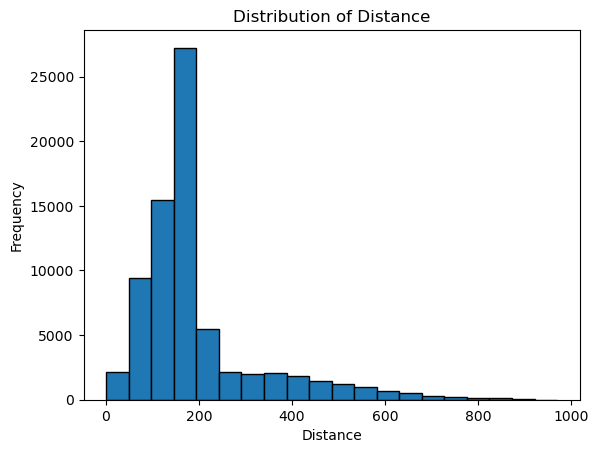

In [51]:
import matplotlib.pyplot as plt

# Create a histogram of the 'Distance' column
plt.hist(filtered_df['Distance'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')

# Display the plot
plt.show()

In [58]:
filtered_df.to_csv(r"C:\Users\raulo\Desktop\ze_vids\filtered_df.csv", index=False)

In [56]:
###
###
###

In [52]:
background_df = df[(df['Behavior'] == "Background")]
background_df

,Behavior,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Eye_L,Client_Eye_L.1,Client_Eye_L.2,Client_Eye_R,Client_Eye_R.1,Client_Eye_R.2,...,Cleaner_Mouth.2,Cleaner_Spine1,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2
0,Background,1315.999,419.526,0.508,1339.880,421.211,0.623,1332.051,410.567,0.996,...,1.000,1250.267,916.767,0.999,1275.120,918.987,0.982,1296.810,914.343,0.860
1,Background,1322.196,419.526,0.997,1324.325,421.211,0.929,1325.046,410.567,0.999,...,1.000,1243.868,916.423,0.999,1275.003,918.987,0.999,1291.494,915.072,0.752
2,Background,1308.093,419.526,0.956,1316.823,427.681,0.959,1323.911,410.782,0.946,...,0.825,1226.928,914.062,0.994,1268.307,917.017,0.998,1282.976,924.739,0.197
3,Background,1301.067,414.470,0.360,1309.184,427.705,0.550,1301.254,411.246,0.107,...,1.000,1218.688,907.569,1.000,1258.767,917.017,0.998,1275.454,924.739,0.376
4,Background,1269.530,414.470,0.975,1309.184,428.566,0.894,1283.725,411.246,0.994,...,1.000,1205.374,907.569,1.000,1236.992,923.606,0.994,1275.454,930.310,0.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494460,Background,298.287,742.995,1.000,269.043,761.646,0.986,290.561,774.583,0.998,...,1.000,844.015,234.474,0.999,835.570,283.475,0.999,806.698,321.148,1.000
494461,Background,295.017,738.109,1.000,269.043,761.591,0.986,291.875,772.057,0.998,...,1.000,849.202,225.127,1.000,843.247,268.478,0.999,817.811,311.338,1.000
494462,Background,293.875,735.024,1.000,269.043,761.590,0.994,291.875,764.526,1.000,...,1.000,850.897,218.751,1.000,847.258,262.442,0.999,820.818,306.764,1.000
494463,Background,289.687,733.892,1.000,269.043,755.672,0.995,291.875,764.125,0.999,...,1.000,850.897,211.232,0.999,852.580,251.502,0.999,832.998,300.703,0.999


In [53]:
proximity_threshold = 200  # Adjust as needed

# Apply the check_proximity function to each row
proximity_results = background_df.apply(lambda row: check_proximity(row, cleaner_points, client_points, proximity_threshold), axis=1)


# Extract proximity and distance values
proximity_values, distance_values = zip(*proximity_results)

# Add 'Proximity' and 'Distance' columns to the DataFrame
background_df['Proximity'] = proximity_values
background_df['Distance'] = distance_values

background_df

C:\Users\raulo\AppData\Local\Temp\ipykernel_19364\3994312693.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background_df['Proximity'] = proximity_values
C:\Users\raulo\AppData\Local\Temp\ipykernel_19364\3994312693.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background_df['Distance'] = distance_values


,Behavior,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Eye_L,Client_Eye_L.1,Client_Eye_L.2,Client_Eye_R,Client_Eye_R.1,Client_Eye_R.2,...,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2,Proximity,Distance
0,Background,1315.999,419.526,0.508,1339.880,421.211,0.623,1332.051,410.567,0.996,...,916.767,0.999,1275.120,918.987,0.982,1296.810,914.343,0.860,Farther,522.967749
1,Background,1322.196,419.526,0.997,1324.325,421.211,0.929,1325.046,410.567,0.999,...,916.423,0.999,1275.003,918.987,0.999,1291.494,915.072,0.752,Farther,540.580968
2,Background,1308.093,419.526,0.956,1316.823,427.681,0.959,1323.911,410.782,0.946,...,914.062,0.994,1268.307,917.017,0.998,1282.976,924.739,0.197,Farther,544.528119
3,Background,1301.067,414.470,0.360,1309.184,427.705,0.550,1301.254,411.246,0.107,...,907.569,1.000,1258.767,917.017,0.998,1275.454,924.739,0.376,Farther,536.607986
4,Background,1269.530,414.470,0.975,1309.184,428.566,0.894,1283.725,411.246,0.994,...,907.569,1.000,1236.992,923.606,0.994,1275.454,930.310,0.158,Farther,532.958271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494460,Background,298.287,742.995,1.000,269.043,761.646,0.986,290.561,774.583,0.998,...,234.474,0.999,835.570,283.475,0.999,806.698,321.148,1.000,Farther,875.849823
494461,Background,295.017,738.109,1.000,269.043,761.591,0.986,291.875,772.057,0.998,...,225.127,1.000,843.247,268.478,0.999,817.811,311.338,1.000,Farther,886.051773
494462,Background,293.875,735.024,1.000,269.043,761.590,0.994,291.875,764.526,1.000,...,218.751,1.000,847.258,262.442,0.999,820.818,306.764,1.000,Farther,889.510977
494463,Background,289.687,733.892,1.000,269.043,755.672,0.995,291.875,764.125,0.999,...,211.232,0.999,852.580,251.502,0.999,832.998,300.703,0.999,Farther,894.907978


In [54]:
background_df["Proximity"].value_counts()

Farther    292051
Close      127798
Name: Proximity, dtype: int64

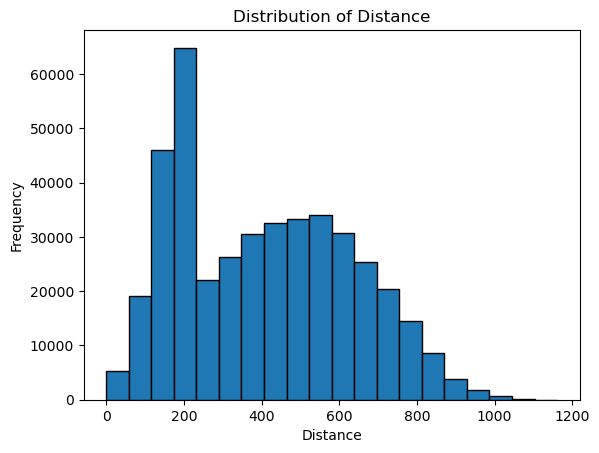

In [55]:
# Create a histogram of the 'Distance' column
plt.hist(background_df['Distance'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')

# Display the plot
plt.show()

In [57]:
background_df.to_csv(r"C:\Users\raulo\Desktop\ze_vids\background_df.csv", index=False)

In [89]:
##
##


In [92]:
def calculate_centroid(points):
    num_points = len(points)
    if num_points == 0:
        return None
    
    sum_x = sum(point[0] for point in points)
    sum_y = sum(point[1] for point in points)
    
    centroid_x = sum_x / num_points
    centroid_y = sum_y / num_points
    
    return centroid_x, centroid_y

# List of point columns for each animal
cleaner_points = ['Cleaner_Mouth', 'Cleaner_Spine1', 'Cleaner_Spine2', 'Cleaner_Tail']
client_points = ['Client_Mouth', 'Client_Eye_L', 'Client_Eye_R', 'Client_Spine_1', 'Client_Spine_2', 'Client_Tail']

# Create columns for centroid coordinates
filtered_df['Cleaner_Centroid_X'] = np.nan
filtered_df['Cleaner_Centroid_Y'] = np.nan
filtered_df['Client_Centroid_X'] = np.nan
filtered_df['Client_Centroid_Y'] = np.nan

# Calculate centroids and add them to the DataFrame
for idx, row in filtered_df.iterrows():
    cleaner_coords = [(row[point], row[point + '.1']) for point in cleaner_points if not pd.isna(row[point])]
    client_coords = [(row[point], row[point + '.1']) for point in client_points if not pd.isna(row[point])]

    cleaner_centroid = calculate_centroid(cleaner_coords) if cleaner_coords else (np.nan, np.nan)
    client_centroid = calculate_centroid(client_coords) if client_coords else (np.nan, np.nan)

    filtered_df.at[idx, 'Cleaner_Centroid_X'] = cleaner_centroid[0]
    filtered_df.at[idx, 'Cleaner_Centroid_Y'] = cleaner_centroid[1]
    filtered_df.at[idx, 'Client_Centroid_X'] = client_centroid[0]
    filtered_df.at[idx, 'Client_Centroid_Y'] = client_centroid[1]

    distance_2 = calculate_distance(cleaner_centroid[0], cleaner_centroid[1], client_centroid[0], client_centroid[1])
    filtered_df.at[idx, 'Distance_2'] = distance_2
    
    if distance_2 < 200:
        filtered_df.at[idx, 'Proximity_2'] = 'Closer'
    else:
        filtered_df.at[idx, 'Proximity_2'] = 'Farther'


C:\Users\raulo\AppData\Local\Temp\ipykernel_19364\540609063.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cleaner_Centroid_X'] = np.nan
C:\Users\raulo\AppData\Local\Temp\ipykernel_19364\540609063.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cleaner_Centroid_Y'] = np.nan
C:\Users\raulo\AppData\Local\Temp\ipykernel_19364\540609063.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [93]:
filtered_df

,Behavior,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Eye_L,Client_Eye_L.1,Client_Eye_L.2,Client_Eye_R,Client_Eye_R.1,Client_Eye_R.2,...,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2,Cleaner_Centroid_X,Cleaner_Centroid_Y,Client_Centroid_X,Client_Centroid_Y,Distance_2,Proximity_2
1567,interaction,1295.012,432.318,1.0,1266.162,419.243,1.0,1267.233,444.660,1.0,...,1.0,1605.840,703.504,1.0,1565.13900,661.74775,1231.128333,430.549500,406.221314,Farther
1568,interaction,1295.923,432.718,1.0,1267.597,419.243,1.0,1268.798,444.660,1.0,...,1.0,1606.277,702.302,1.0,1562.46675,659.25225,1232.326833,430.377500,401.716337,Farther
1569,interaction,1301.080,433.035,1.0,1270.526,419.243,1.0,1278.369,444.879,1.0,...,1.0,1606.277,687.858,1.0,1558.45150,652.12250,1235.400667,430.486333,391.770891,Farther
1570,interaction,1305.797,433.455,1.0,1278.251,420.589,1.0,1280.880,444.879,1.0,...,1.0,1605.840,674.324,1.0,1553.37800,646.57950,1238.888333,430.885833,381.349588,Farther
1571,interaction,1308.288,435.489,1.0,1278.804,420.998,1.0,1282.299,445.310,1.0,...,1.0,1605.840,670.711,1.0,1550.32425,644.51050,1240.162667,431.337000,376.355084,Farther
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491183,interaction,491.678,754.183,1.0,461.218,742.320,1.0,462.082,764.914,1.0,...,1.0,620.103,692.081,1.0,557.30400,674.74725,425.824000,749.478000,151.233843,Closer
491184,interaction,493.421,758.459,1.0,466.957,743.474,1.0,463.535,771.482,1.0,...,1.0,609.977,703.529,1.0,548.37325,671.99400,429.616000,751.424333,142.872189,Closer
491185,interaction,501.507,758.483,1.0,475.468,747.522,1.0,466.792,772.151,1.0,...,1.0,596.662,703.529,1.0,537.60275,667.70150,435.021500,751.727833,132.602178,Closer
491186,interaction,506.593,759.770,1.0,476.792,747.522,1.0,469.242,772.878,1.0,...,1.0,589.458,703.529,1.0,534.91700,666.14675,437.561167,751.817500,129.682827,Closer


In [94]:
filtered_df["Proximity_2"].value_counts()

Closer     46014
Farther    27484
Name: Proximity_2, dtype: int64

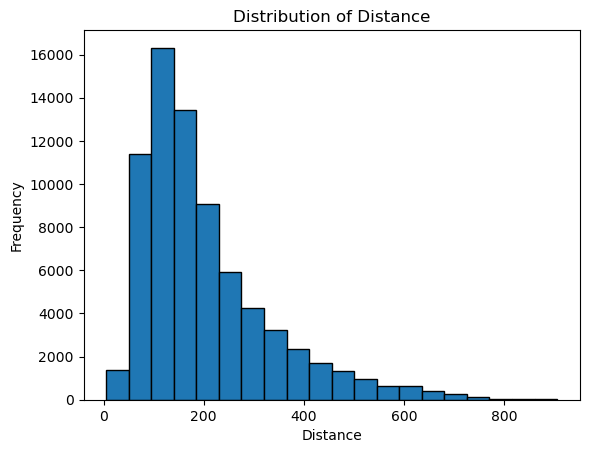

In [95]:
# Create a histogram of the 'Distance' column
plt.hist(filtered_df['Distance_2'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')

# Display the plot
plt.show()

In [102]:
filtered_df.to_csv(r"C:\Users\raulo\Desktop\ze_vids\filtered_df2.csv", index=False)

In [97]:
# Create columns for centroid coordinates
background_df['Cleaner_Centroid_X'] = np.nan
background_df['Cleaner_Centroid_Y'] = np.nan
background_df['Client_Centroid_X'] = np.nan
background_df['Client_Centroid_Y'] = np.nan

# Calculate centroids and add them to the DataFrame
for idx, row in background_df.iterrows():
    cleaner_coords = [(row[point], row[point + '.1']) for point in cleaner_points if not pd.isna(row[point])]
    client_coords = [(row[point], row[point + '.1']) for point in client_points if not pd.isna(row[point])]

    cleaner_centroid = calculate_centroid(cleaner_coords) if cleaner_coords else (np.nan, np.nan)
    client_centroid = calculate_centroid(client_coords) if client_coords else (np.nan, np.nan)

    background_df.at[idx, 'Cleaner_Centroid_X'] = cleaner_centroid[0]
    background_df.at[idx, 'Cleaner_Centroid_Y'] = cleaner_centroid[1]
    background_df.at[idx, 'Client_Centroid_X'] = client_centroid[0]
    background_df.at[idx, 'Client_Centroid_Y'] = client_centroid[1]

    distance_2 = calculate_distance(cleaner_centroid[0], cleaner_centroid[1], client_centroid[0], client_centroid[1])
    background_df.at[idx, 'Distance_2'] = distance_2
    
    if distance_2 < 200:
        background_df.at[idx, 'Proximity_2'] = 'Closer'
    else:
        background_df.at[idx, 'Proximity_2'] = 'Farther'

C:\Users\raulo\AppData\Local\Temp\ipykernel_19364\2146573943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background_df['Cleaner_Centroid_X'] = np.nan
C:\Users\raulo\AppData\Local\Temp\ipykernel_19364\2146573943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background_df['Cleaner_Centroid_Y'] = np.nan
C:\Users\raulo\AppData\Local\Temp\ipykernel_19364\2146573943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [98]:
background_df

,Behavior,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Eye_L,Client_Eye_L.1,Client_Eye_L.2,Client_Eye_R,Client_Eye_R.1,Client_Eye_R.2,...,Cleaner_Tail.1,Cleaner_Tail.2,Proximity,Distance,Cleaner_Centroid_X,Cleaner_Centroid_Y,Client_Centroid_X,Client_Centroid_Y,Distance_2,Proximity_2
0,Background,1315.999,419.526,0.508,1339.880,421.211,0.623,1332.051,410.567,0.996,...,914.343,0.860,Farther,522.967749,1259.71725,913.99775,1362.679833,423.706500,500.985832,Farther
1,Background,1322.196,419.526,0.997,1324.325,421.211,0.929,1325.046,410.567,0.999,...,915.072,0.752,Farther,540.580968,1253.47325,914.09400,1359.102833,419.230833,506.011030,Farther
2,Background,1308.093,419.526,0.956,1316.823,427.681,0.959,1323.911,410.782,0.946,...,924.739,0.197,Farther,544.528119,1241.82950,915.11000,1355.204333,420.345000,507.588670,Farther
3,Background,1301.067,414.470,0.360,1309.184,427.705,0.550,1301.254,411.246,0.107,...,924.739,0.376,Farther,536.607986,1232.96375,912.63100,1342.842667,418.297333,506.398213,Farther
4,Background,1269.530,414.470,0.975,1309.184,428.566,0.894,1283.725,411.246,0.994,...,930.310,0.158,Farther,532.958271,1222.79100,915.67100,1319.903833,418.440833,506.624852,Farther
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494460,Background,298.287,742.995,1.000,269.043,761.646,0.986,290.561,774.583,0.998,...,321.148,1.000,Farther,875.849823,832.83700,256.28975,257.018667,788.251000,783.932092,Farther
494461,Background,295.017,738.109,1.000,269.043,761.591,0.986,291.875,772.057,0.998,...,311.338,1.000,Farther,886.051773,838.83125,244.95700,256.781333,787.032167,795.378898,Farther
494462,Background,293.875,735.024,1.000,269.043,761.590,0.994,291.875,764.526,1.000,...,306.764,1.000,Farther,889.510977,840.66450,239.70475,257.208167,785.244500,798.770876,Farther
494463,Background,289.687,733.892,1.000,269.043,755.672,0.995,291.875,764.125,0.999,...,300.703,0.999,Farther,894.907978,845.04000,232.80100,256.497167,783.842667,806.244123,Farther


In [99]:
background_df["Proximity_2"].value_counts()

Farther    342943
Closer      76906
Name: Proximity_2, dtype: int64

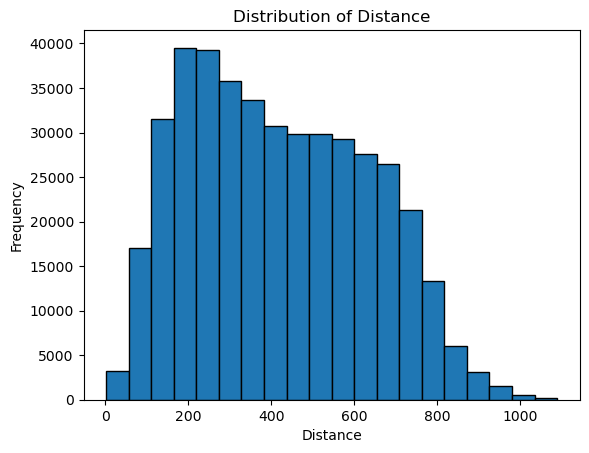

In [100]:
# Create a histogram of the 'Distance' column
plt.hist(background_df['Distance_2'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')

# Display the plot
plt.show()

In [103]:
background_df.to_csv(r"C:\Users\raulo\Desktop\ze_vids\background_df2.csv", index=False)